# Interspeech


In [1]:
import matplotlib.pyplot

In [2]:
import numpy as np
import pandas as pd

import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from sklearn.model_selection import train_test_split
import random

import keras
from keras import backend as K
from keras import layers

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import Convolution2D

from keras.layers.core import Dense, Permute, Reshape
from keras.layers.normalization import BatchNormalization
from keras.layers.wrappers import Bidirectional
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.regularizers import l2

import tensorflow as tf

Using TensorFlow backend.


In [3]:
global X, T
X=[]
T=[]

In [4]:
def loaddata(filename,num):
    f=sio.loadmat(filename)
    data=f['cep']
    data=np.asarray(data)
    mean=np.mean(data,axis=0)
    std=np.std(data,axis=0)
    data=(data-mean)/std
    data=np.asarray(np.vsplit(data[0:int(data.shape[0]/data.shape[1])*data.shape[1]],int(data.shape[0]/data.shape[1])))
    for i in range (data.shape[0]):
        X.append(data[i])
        T.append(num)
    return X, T

In [5]:
X,T = loaddata('assamese.mat',0)
len(X), len(T)

(5704, 5704)

In [6]:
X,T = loaddata('bengali.mat',1)
len(X), len(T)

(8880, 8880)

In [7]:
X,T = loaddata('kannada.mat',2)
len(X),len(T)

(15135, 15135)

In [8]:
X,T = loaddata('malayalam.mat',3)
len(X),len(T)

(18272, 18272)

In [9]:
X,T = loaddata('punjabi.mat',4)
len(X),len(T)

(21083, 21083)

In [10]:
X,T = loaddata('rajasthani.mat',5)
len(X),len(T)

(24092, 24092)

In [11]:
X,T = loaddata('tamil.mat',6)
len(X),len(T)

(27027, 27027)

In [12]:
X,T = loaddata('telugu.mat',7)
len(X),len(T)

(29906, 29906)

## Split Dataset

In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(np.array(X),np.array(T), train_size=0.8, random_state=30)
np.array(Xtrain).shape, np.array(Xtest).shape

c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((23924, 39, 39), (5982, 39, 39))

## Convert 2D dataset to a 1D vector

In [14]:
batchSize=128
num_classes=8
epochs=100
imageRows, imageCols =39,39

In [15]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], imageRows, imageCols, 1)
Xtest = Xtest.reshape(Xtest.shape[0], imageRows,imageCols, 1)
input_shape = (imageRows, imageCols, 1)
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')

In [16]:
input_shape

(39, 39, 1)

In [17]:
Ytrain = keras.utils.to_categorical(Ytrain, num_classes)
Ytest = keras.utils.to_categorical(Ytest, num_classes)

## Define CNN Model

In [18]:
weight_decay = 0.001

model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # (bs, y, x, c) --> (bs, x, y, c)
model.add(Permute((2, 1, 3)))

    # (bs, x, y, c) --> (bs, x, y * c)
bs, x, y, c = model.layers[-1].output_shape
model.add(Reshape((x, y*c)))

model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
model.add(Dense(num_classes, activation="softmax"))


c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(39, 39, 1..., kernel_regularizer=<keras.reg...)`
  """
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  del sys.path[0]
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, kernel_si

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 39, 39, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 39, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 19, 19, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 256)         295168    
__________

## Model Train

In [20]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [21]:
speechTrainData=model.fit(Xtrain, Ytrain,batch_size=batchSize,epochs=epochs,verbose=1,validation_data=(Xtest, Ytest))

Train on 23924 samples, validate on 5982 samples
Epoch 1/100
23924/23924 [==============================] - 27s 1ms/step - loss: 2.2563 - acc: 0.7439 - val_loss: 1.8166 - val_acc: 0.7994
Epoch 2/100
23924/23924 [==============================] - 22s 915us/step - loss: 1.2249 - acc: 0.9211 - val_loss: 1.1853 - val_acc: 0.8806
Epoch 3/100
23924/23924 [==============================] - 22s 908us/step - loss: 0.8049 - acc: 0.9524 - val_loss: 1.0098 - val_acc: 0.8648
Epoch 4/100
23924/23924 [==============================] - 22s 907us/step - loss: 0.5937 - acc: 0.9607 - val_loss: 0.5652 - val_acc: 0.9458
Epoch 5/100
23924/23924 [==============================] - 23s 952us/step - loss: 0.4546 - acc: 0.9708 - val_loss: 0.5055 - val_acc: 0.9398
Epoch 6/100
23924/23924 [==============================] - 21s 890us/step - loss: 0.3856 - acc: 0.9723 - val_loss: 0.8625 - val_acc: 0.8492
Epoch 7/100
23924/23924 [==============================] - 21s 887us/step - loss: 0.3417 - acc: 0.9762 - val_loss

23924/23924 [==============================] - 21s 881us/step - loss: 0.1382 - acc: 0.9889 - val_loss: 0.2017 - val_acc: 0.9714
Epoch 59/100
23924/23924 [==============================] - 21s 883us/step - loss: 0.1267 - acc: 0.9913 - val_loss: 0.2854 - val_acc: 0.9525
Epoch 60/100
23924/23924 [==============================] - 21s 885us/step - loss: 0.1321 - acc: 0.9906 - val_loss: 0.2354 - val_acc: 0.9585
Epoch 61/100
23924/23924 [==============================] - 21s 883us/step - loss: 0.1302 - acc: 0.9909 - val_loss: 0.1977 - val_acc: 0.9744
Epoch 62/100
23924/23924 [==============================] - 21s 883us/step - loss: 0.1317 - acc: 0.9894 - val_loss: 0.2880 - val_acc: 0.9502
Epoch 63/100
23924/23924 [==============================] - 21s 882us/step - loss: 0.1291 - acc: 0.9904 - val_loss: 0.4102 - val_acc: 0.9224
Epoch 64/100
23924/23924 [==============================] - 21s 884us/step - loss: 0.1314 - acc: 0.9905 - val_loss: 0.2372 - val_acc: 0.9626
Epoch 65/100
23924/23924 [

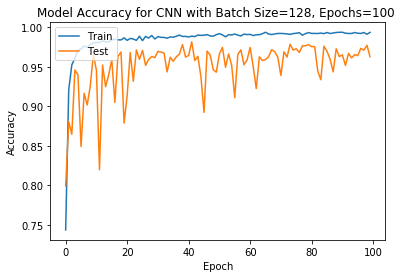

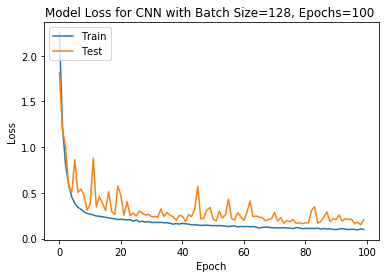

In [22]:
plt.plot(speechTrainData.history['acc'])
plt.plot(speechTrainData.history['val_acc'])
plt.title('Model Accuracy for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot Model  Loss
plt.plot(speechTrainData.history['loss'])
plt.plot(speechTrainData.history['val_loss'])
plt.title('Model Loss for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
def ConfusionMatrix(actual,predicts,numberClasses,classname):
    nc=numberClasses
    confmat=np.zeros([nc,nc])
    I = pd.Index(classname, name="rows")
    C = pd.Index(classname, name="columns")
    for ri in range (nc):
        value=[]
        trueIndex=np.where(actual[:,ri]==1)
        for j in range (len(trueIndex[0])):
            value.append(predict[trueIndex[0][j]])
        for rj in range (nc):
            confmat[ri][rj]=100*np.mean(value,axis=0)[rj]
    df = pd.DataFrame(data=confmat, index=I, columns=C)
    print(df)
    return

In [24]:
predict=model.predict(Xtrain)
print('Confusion Matrix for Train Data')
ConfusionMatrix(Ytrain,predict,num_classes,['Assamese','Bengali','Kannada','Malayalam','Punjabi','Rajasthani','Tamil','Telugu'])

Confusion Matrix for Train Data
columns      Assamese    Bengali    Kannada  Malayalam    Punjabi  Rajasthani  \
rows                                                                            
Assamese    99.905562   0.001514   0.004804   0.012597   0.004470    0.008297   
Bengali      0.002416  95.124429   0.059934   4.776638   0.001694    0.002850   
Kannada      0.034464   0.006112  99.338311   0.385437   0.021545    0.062039   
Malayalam    0.035800   0.232431   0.109943  99.475962   0.003140    0.009776   
Punjabi      4.824089   0.008477   0.040474   0.008410  94.714206    0.040597   
Rajasthani   0.042117   0.013782   0.393302   0.351094   0.023904   98.646325   
Tamil        0.043630   0.319870   0.566266   6.392008   0.029106    0.098892   
Telugu       0.004597   0.001750   0.009452   0.038303   0.005829    0.025816   

columns         Tamil     Telugu  
rows                              
Assamese     0.005688   0.057687  
Bengali      0.028587   0.003470  
Kannada      0.08

In [25]:
predict=model.predict(Xtest)
print('Confusion Matrix for Test Data')
ConfusionMatrix(Ytest,predict,num_classes,['Assamese','Bengali','Kannada','Malayalam','Punjabi','Rajasthani','Tamil','Telugu'])

Confusion Matrix for Test Data
columns      Assamese    Bengali    Kannada  Malayalam    Punjabi  Rajasthani  \
rows                                                                            
Assamese    99.462986   0.003519   0.021256   0.140397   0.008616    0.026901   
Bengali      0.004900  89.228219   0.127791  10.575354   0.002840    0.005791   
Kannada      0.125534   0.063462  97.886664   1.271885   0.026132    0.079384   
Malayalam    0.279778   1.619455   1.534715  95.742279   0.012412    0.052599   
Punjabi      4.645595   0.014961   0.192924   0.026584  93.927532    0.266429   
Rajasthani   0.205246   0.052148   1.395504   1.130102   0.057051   95.862186   
Tamil        0.085624   1.084717   1.429446  11.114226   0.030614    0.203444   
Telugu       0.170001   0.003671   0.042512   0.058644   0.010215    0.224109   

columns         Tamil     Telugu  
rows                              
Assamese     0.012300   0.324312  
Bengali      0.047567   0.007487  
Kannada      0.136